Сортування сміття

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
geo_data = pd.read_csv('geoMap_sort.csv', skiprows=3, header=None)
geo_data.columns = ['Region', 'Trend']
year_data = pd.read_csv('AmultiTimeline.csv', skiprows=3, header=None)
year_data.columns = ['Date', 'Trend']
year_data["Date"] = pd.to_datetime(year_data["Date"])

In [3]:
print(geo_data.head())

                 Region  Trend
0    Рівненська область  100.0
1  Закарпатська область   91.0
2     Волинська область   82.0
3   Чернівецька область   80.0
4   Хмельницька область   80.0


Описова статистика

Середнє значення

In [4]:
mean_trend_geo = geo_data['Trend'].mean()
print("Середнє значення тренду для всіх регіонів:", mean_trend_geo)

Середнє значення тренду для всіх регіонів: 62.08695652173913


Трохи вище за середнє - за 50, тобто ми можемо стверджувати про актуальність тренду.

Шукаємо медіану

In [5]:
median_trend_geo = geo_data['Trend'].median()
print("Медіана тренду для всіх регіонів:", median_trend_geo)

Медіана тренду для всіх регіонів: 63.0


Середній інтерес(63)

Стандартне відхилення

In [6]:
std_trend_geo = geo_data['Trend'].std()
print("Стандартне відхилення тренду для всіх регіонів:", std_trend_geo)

Стандартне відхилення тренду для всіх регіонів: 19.577150511103177


Високе стандартне відхилення - стабільно розподільно тренд по регіонам.

Мінімум та максимум

In [7]:
min_trend_geo = geo_data['Trend'].min()
max_trend_geo = geo_data['Trend'].max()
print(f"Мінімум {min_trend_geo} та максимум {max_trend_geo}.")

Мінімум 26.0 та максимум 100.0.


Мода

In [8]:
mode_trend_geo = geo_data['Trend'].mode()
print("Мода тренду для всіх регіонів:", mode_trend_geo.values)

Мода тренду для всіх регіонів: [37. 61. 63. 80.]


Найпопулярніші значення досить рівномірно розподілені

Дисперсія

In [9]:
var_trend_geo = geo_data['Trend'].var()
print("Дисперсія тренду для всіх регіонів:", var_trend_geo)

Дисперсія тренду для всіх регіонів: 383.2648221343874


In [10]:
geo_data['Normalized'] = (geo_data['Trend'] - geo_data['Trend'].min()) / (geo_data['Trend'].max() - geo_data['Trend'].min())

In [11]:
geo_data['Normalized'].var()

0.06998992369145131

In [12]:
geo_data['Normalized'].std()

0.2645560879878808

In [13]:
print(year_data.head())

        Date  Trend
0 2023-11-12     23
1 2023-11-19     30
2 2023-11-26     28
3 2023-12-03     21
4 2023-12-10     35


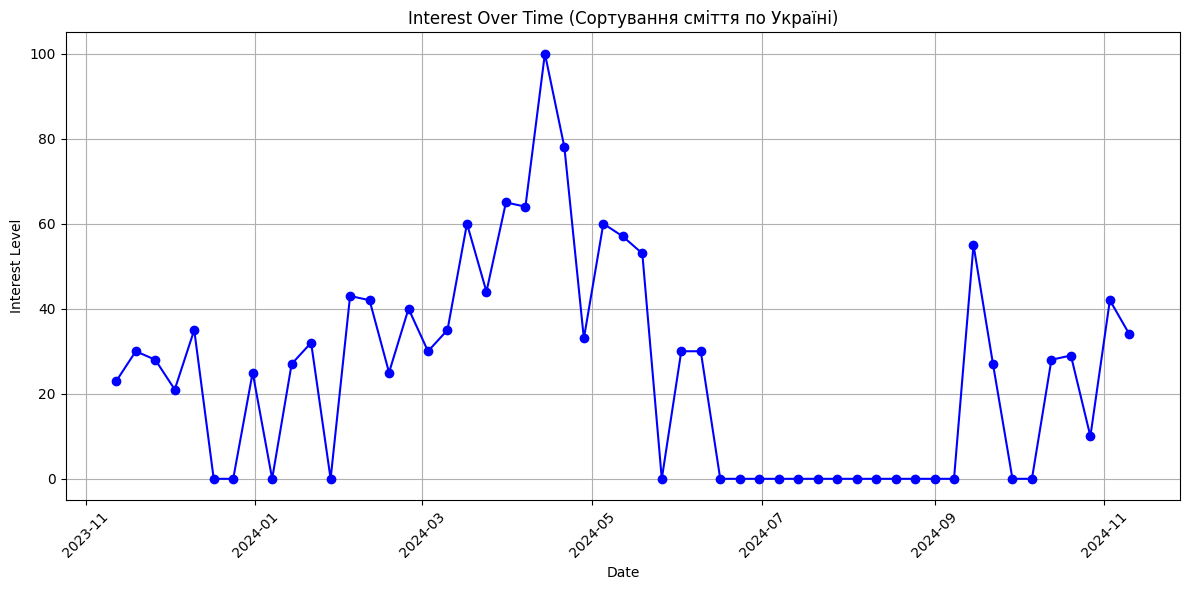

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(year_data["Date"], year_data["Trend"], marker='o', color='b', linestyle='-')
plt.title("Interest Over Time (Сортування сміття по Україні)")
plt.xlabel("Date")
plt.ylabel("Interest Level")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

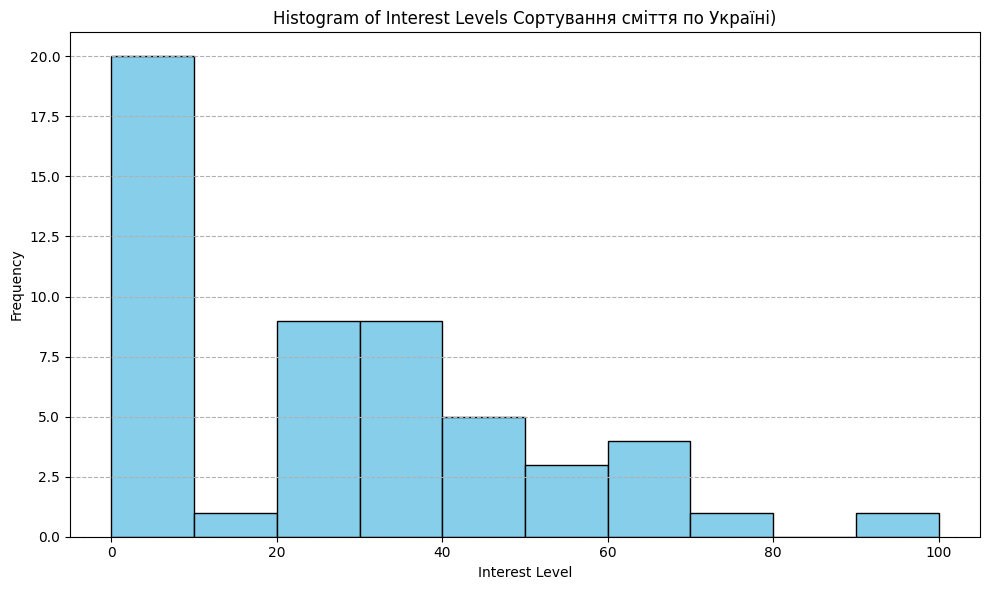

In [15]:
plt.figure(figsize=(10, 6))
plt.hist(year_data["Trend"], bins=10, color='skyblue', edgecolor='black')
plt.title("Histogram of Interest Levels Сортування сміття по Україні)")
plt.xlabel("Interest Level")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

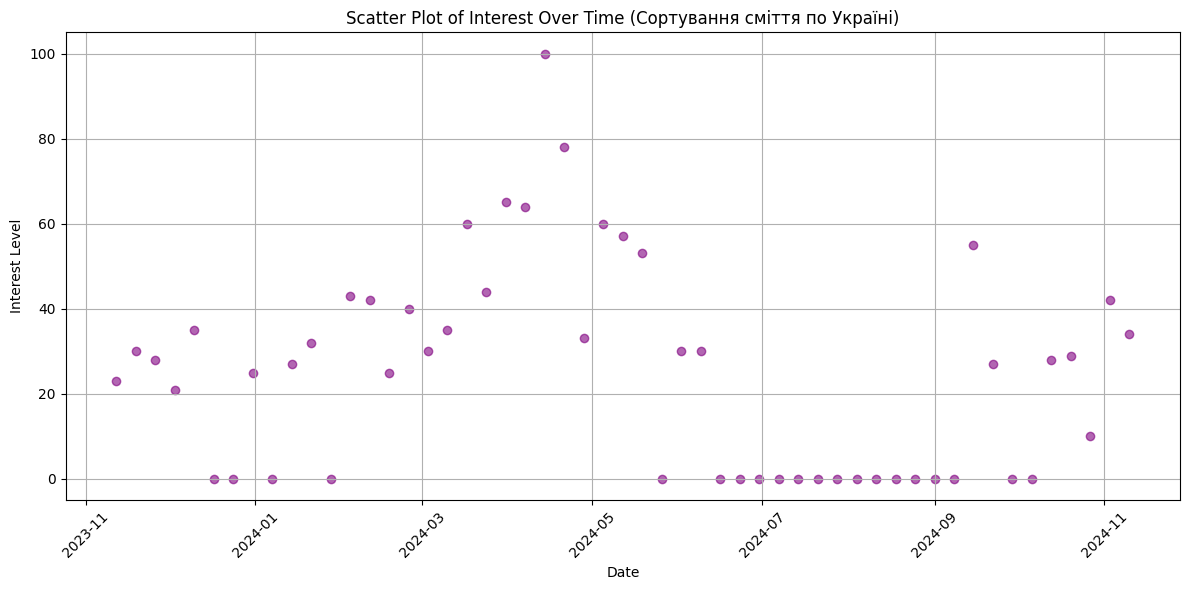

In [16]:
plt.figure(figsize=(12, 6))
plt.scatter(year_data["Date"], year_data["Trend"], color='purple', alpha=0.6)
plt.title("Scatter Plot of Interest Over Time (Сортування сміття по Україні)")
plt.xlabel("Date")
plt.ylabel("Interest Level")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

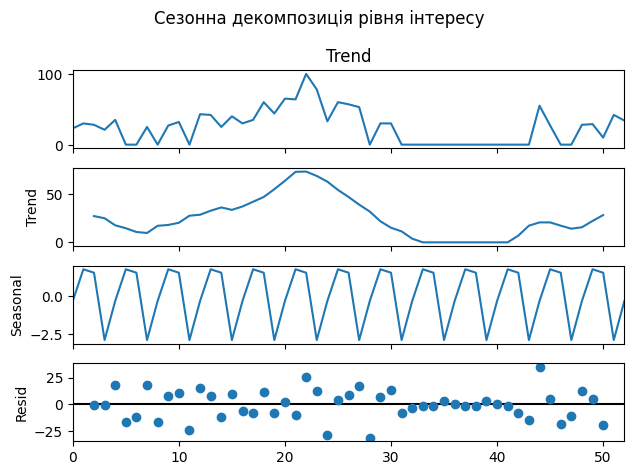

In [17]:
decomposition = seasonal_decompose(year_data["Trend"], model="additive", period=4) 
decomposition.plot()
plt.suptitle("Сезонна декомпозиція рівня інтересу")
plt.tight_layout()
plt.show()

Висновок: Тренд рівня інтересу демонструє нестабільність, що свідчить про вплив зовнішніх факторів або подій. Сезонна компонента чітко повторюється, вказуючи на періодичність інтересу, що, ймовірно, має циклічний характер. Графік показує випадкові коливання, які не пояснюються ні трендом, ні сезонністю. Це підкреслює наявність додаткових непередбачуваних факторів, що впливають на рівень інтересу.